In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
purchase = pd.read_csv('purchase_cleaned.csv')
user = pd.read_csv('segment.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'purchase_cleaned.csv'

In [ ]:
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
0,1,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0
1,1,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0
2,1,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0
3,1,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0
4,1,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0


In [ ]:
user.head()

,Sex,Marital status,Age,Income,Settlement size,id,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2
0,0,0,67,124670,2,1,False,False,True,False,False,True,False
1,1,1,22,150773,2,2,False,True,False,False,False,True,False
2,0,0,49,89210,0,3,False,True,False,False,True,False,False
3,0,0,45,171565,1,4,False,True,False,False,False,True,False
4,0,0,53,149031,1,5,False,True,False,False,False,True,False


In [ ]:
user.rename(columns = {'id':'ID'}, inplace = True)
user['Age_Band'] = user['Age'].apply(lambda x: 1 if x <= 25 else 2 if x > 25 and x <= 40 else 3 if x > 40 and x <= 55 else 4)
user['Income_Band'] = user['Income'].apply(lambda x: 1 if x <= 100000 else 2 if x > 100000 and x <= 150000 else 3 if x > 150000 and x <= 200000 else 4)

user = pd.get_dummies(user, columns=['Settlement size', 'Age_Band', 'Income_Band'])

In [ ]:
user['Age_Std'] = user['Age'].apply(lambda x: (x - user['Age'].mean())/user['Age'].std())
user['Income_Std'] = user['Income'].apply(lambda x: (x - user['Income'].mean())/user['Income'].std())

In [ ]:
user.columns

Index(['Sex', 'Marital status', 'Age', 'Income', 'ID', 'Education_0',
       'Education_1', 'Education_2', 'Education_3', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Settlement size_0',
       'Settlement size_1', 'Settlement size_2', 'Age_Band_1', 'Age_Band_2',
       'Age_Band_3', 'Age_Band_4', 'Income_Band_1', 'Income_Band_2',
       'Income_Band_3', 'Income_Band_4', 'Age_Std', 'Income_Std'],
      dtype='object')

In [ ]:
user_seg = user[['Sex',  'Age_Std', 'Income_Std', 'Marital status', 'Education_0',
       'Education_1', 'Education_2', 'Education_3', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Settlement size_0',
       'Settlement size_1', 'Settlement size_2']]

user_seg.head()

,Sex,Age_Std,Income_Std,Marital status,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,0,2.652951,0.097499,0,False,False,True,False,False,True,False,0,0,1
1,1,-1.186835,0.782459,1,False,True,False,False,False,True,False,0,0,1
2,0,1.117036,-0.832994,0,False,True,False,False,True,False,False,1,0,0
3,0,0.775722,1.328054,0,False,True,False,False,False,True,False,0,1,0
4,0,1.458351,0.736747,0,False,True,False,False,False,True,False,0,1,0


In [ ]:
user_seg.head()

,Sex,Age_Std,Income_Std,Marital status,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,0,2.652951,0.097499,0,False,False,True,False,False,True,False,0,0,1
1,1,-1.186835,0.782459,1,False,True,False,False,False,True,False,0,0,1
2,0,1.117036,-0.832994,0,False,True,False,False,True,False,False,1,0,0
3,0,0.775722,1.328054,0,False,True,False,False,False,True,False,0,1,0
4,0,1.458351,0.736747,0,False,True,False,False,False,True,False,0,1,0


# Clustering

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

Elbow Method to determine the number of clusters to be formed:


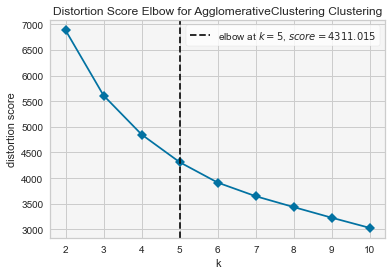

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(
    AgglomerativeClustering(),
    k=10,
    locate_elbow=True,
    timings=False
)

# Set a different background color (e.g., light gray)
Elbow_M.ax.set_facecolor("#F5F5F5")

Elbow_M.fit(user_seg)
Elbow_M.show()

In [ ]:
# Initialize the Agglomerative Clustering model with 5 clusters
AC = AgglomerativeClustering(n_clusters=5)

# Fit the model and predict clusters
yhat_AC = AC.fit_predict(user_seg)

user_seg['Clusters'] = yhat_AC
user['Clusters'] = yhat_AC

C:\Users\LI RUIQIAN\AppData\Local\Temp\ipykernel_28004\576711061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_seg['Clusters'] = yhat_AC


In [ ]:
user_seg.head()

,Sex,Age_Std,Income_Std,Marital status,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2,Clusters
0,0,2.652951,0.097499,0,False,False,True,False,False,True,False,0,0,1,2
1,1,-1.186835,0.782459,1,False,True,False,False,False,True,False,0,0,1,3
2,0,1.117036,-0.832994,0,False,True,False,False,True,False,False,1,0,0,1
3,0,0.775722,1.328054,0,False,True,False,False,False,True,False,0,1,0,0
4,0,1.458351,0.736747,0,False,True,False,False,False,True,False,0,1,0,0


In [ ]:
user.head()

,Sex,Marital status,Age,Income,ID,Education_0,Education_1,Education_2,Education_3,Occupation_0,...,Age_Band_2,Age_Band_3,Age_Band_4,Income_Band_1,Income_Band_2,Income_Band_3,Income_Band_4,Age_Std,Income_Std,Clusters
0,0,0,67,124670,1,False,False,True,False,False,...,0,0,1,0,1,0,0,2.652951,0.097499,2
1,1,1,22,150773,2,False,True,False,False,False,...,0,0,0,0,0,1,0,-1.186835,0.782459,3
2,0,0,49,89210,3,False,True,False,False,True,...,0,1,0,1,0,0,0,1.117036,-0.832994,1
3,0,0,45,171565,4,False,True,False,False,False,...,0,1,0,0,0,1,0,0.775722,1.328054,0
4,0,0,53,149031,5,False,True,False,False,False,...,0,1,0,0,1,0,0,1.458351,0.736747,0


# Evaluation

In [ ]:
import seaborn as sns

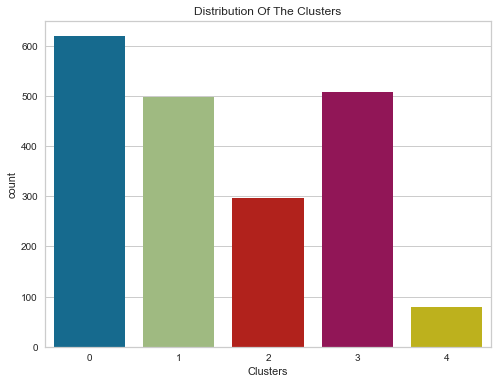

In [ ]:
# Create a countplot of the cluster distribution
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x=user["Clusters"])

# Set the title
countplot.set_title("Distribution Of The Clusters")

# Show the plot
plt.show()

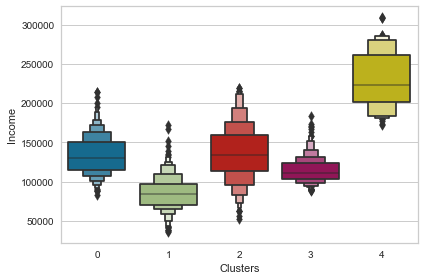

In [ ]:
# Boxenplot on the right subplot with bright colors
sns.boxenplot(x=user["Clusters"], y=user["Income"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
user.columns

Index(['ID', 'Recency', 'Frequency', 'MonetaryValue', 'Sex', 'Marital status',
       'Age', 'Income', 'Education_0', 'Education_1', 'Education_2',
       'Education_3', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Settlement size_0', 'Settlement size_1', 'Settlement size_2',
       'Age_Band_1', 'Age_Band_2', 'Age_Band_3', 'Age_Band_4', 'Income_Band_1',
       'Income_Band_2', 'Income_Band_3', 'Income_Band_4', 'Age_Std',
       'Income_Std', 'Clusters'],
      dtype='object')

In [ ]:
user['Education'] = user['Education_1'] + user['Education_2']*2 + user['Education_3']*3
user['Occupation'] = user['Occupation_1'] + user['Occupation_2']*2
user['Settlement_Size'] = user['Settlement size_1'] + user['Settlement size_2']*2

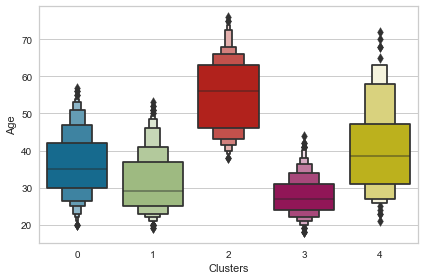

In [ ]:
# Boxenplot on the right subplot with bright colors
sns.boxenplot(x=user["Clusters"], y=user["Age"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

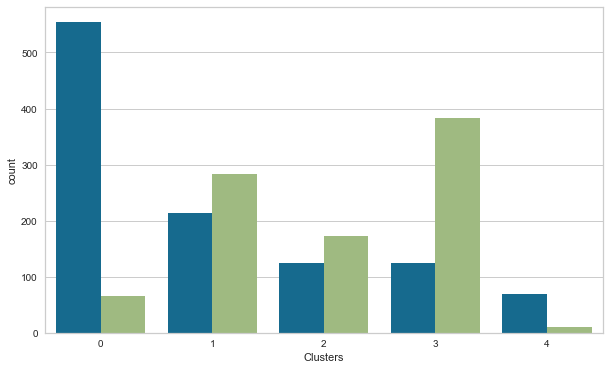

In [ ]:
# Sex distribution
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x=user["Clusters"], hue=user["Sex"])

# Show the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

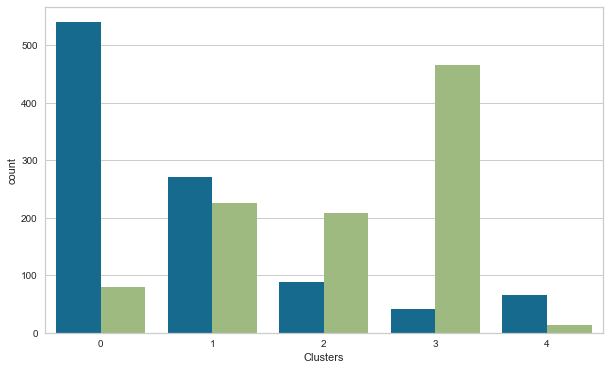

In [ ]:
# Marital Status distribution
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x=user["Clusters"], hue=user["Marital status"])

# Show the plot
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

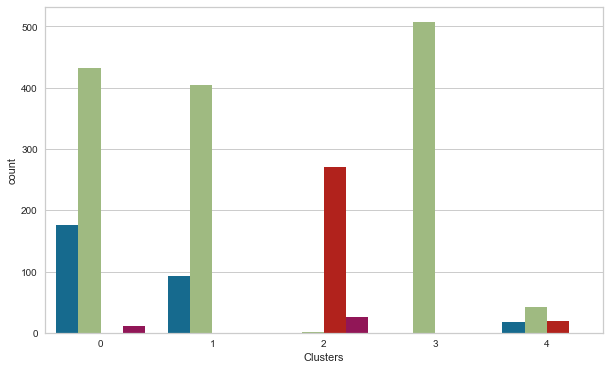

In [ ]:
# Education distribution
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x=user["Clusters"], hue=user["Education"])

# Show the plot
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

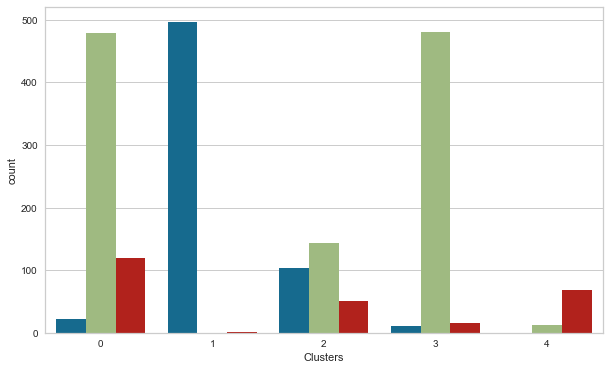

In [ ]:
# Occupation distribution
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x=user["Clusters"], hue=user["Occupation"])

# Show the plot
plt.show()

AttributeError: 'numpy.uint8' object has no attribute 'startswith'

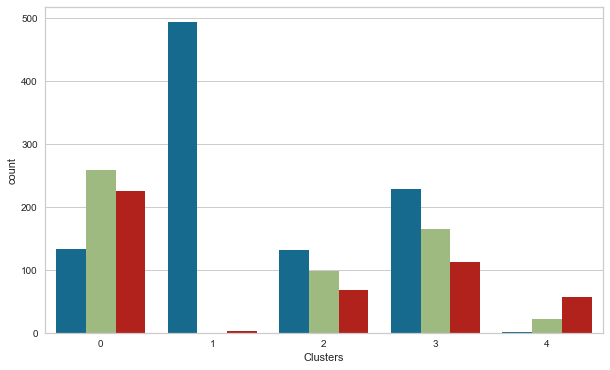

In [ ]:
# Settlement Size distribution
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x=user["Clusters"], hue=user["Settlement_Size"])

# Show the plot
plt.show()

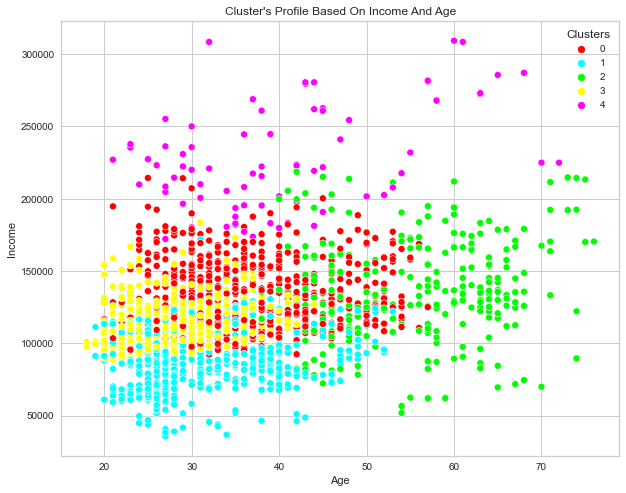

In [ ]:
# Create a scatterplot
bright_palette = ["#FF0000", "#00FFFF", "#00FF00", "#FFFF00", "#FF00FF"]
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(data=user, x="Age", y="Income", hue="Clusters", palette=bright_palette)

# Set the title
scatterplot.set_title("Cluster's Profile Based On Income And Age")

# Show the legend
plt.legend(title="Clusters")

# Show the plot
plt.show()

# Profiling

In [ ]:
x= user.groupby('Clusters')[['Sex', 'Marital status', 'Age', 'Income', 'Education', 'Occupation', 'Settlement_Size']].sum()
x.head()

,Sex,Marital status,Age,Income,Education,Occupation,Settlement_Size
Clusters,,,,,,,
0,575,549,26362,85867862,752,399,124
1,137,216,24821,94577504,581,819,967
2,195,218,17576,44476744,669,267,260
3,7,10,3059,16986728,74,136,127


In [ ]:
count = user.groupby('Clusters')['Clusters'].count()
x = x.div(count, axis=0)
x

,Sex,Marital status,Age,Income,Education,Occupation,Settlement_Size
Clusters,,,,,,,
0,0.649718,0.620339,29.787571,97025.832768,0.849718,0.450847,0.140113
1,0.191608,0.302098,34.714685,132276.229371,0.812587,1.145455,1.352448
2,0.598160,0.668712,53.914110,136431.730061,2.052147,0.819018,0.797546
3,0.094595,0.135135,41.337838,229550.378378,1.000000,1.837838,1.716216


# Segmented Purchase

In [ ]:
mapper = dict(zip(user['ID'], user['Clusters']))
purchase["Clusters"] = purchase["ID"].map(mapper)

In [ ]:
purchase.head(10)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Clusters
0,1,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,2
1,1,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,2
2,1,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,2
3,1,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,2
4,1,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,2
5,1,23,0,0,0,0,0,1.50,1.90,1.99,2.09,2.66,0,0,0,0,0,2
6,1,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,2
7,1,37,0,0,0,2,1,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,2
8,1,41,0,0,0,0,0,1.35,1.58,1.97,2.09,2.67,1,1,1,0,0,2
9,1,43,0,0,0,0,0,1.35,1.58,1.97,2.09,2.67,1,1,1,0,0,2


In [ ]:
rfm = pd.read_csv('customer.csv')
rfm = rfm.iloc[: , 1:]
rfm = rfm.drop(columns = ['id'], axis = 1)

In [ ]:
rfm.head()

,ID,Recency,Frequency,MonetaryValue,Sex,Marital status,Age,Income,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,1,3,9,33.96,0,0,67,124670,False,False,True,False,False,True,False,False,False,True
1,2,1,11,41.74,1,1,22,150773,False,True,False,False,False,True,False,False,False,True
2,3,6,10,32.27,0,0,49,89210,False,True,False,False,True,False,False,True,False,False
3,4,5,11,32.96,0,0,45,171565,False,True,False,False,False,True,False,False,True,False
4,5,1,13,54.97,0,0,53,149031,False,True,False,False,False,True,False,False,True,False


In [ ]:
merged_purchase = pd.merge(purchase, rfm, on='ID', how='left')
merged_purchase.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Clusters', 'Recency', 'Frequency', 'MonetaryValue',
       'Sex', 'Marital status', 'Age', 'Income', 'Education_0', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Settlement size_0', 'Settlement size_1',
       'Settlement size_2'],
      dtype='object')

In [ ]:
def calculate_spending(row):
    if row['Brand'] != 0:
        row_name = f'Price_{row["Brand"]}'
        row_name = row_name[:7]
        return row[row_name] * row['Quantity']
    else:
        return 0

merged_purchase['Spending'] = merged_purchase.apply(calculate_spending, axis=1)

In [ ]:
def purchase_promoted_brand(row):
    if row['Brand'] != 0:
        row_name = f'Promotion_{row["Brand"]}'
        row_name = row_name[:11]
        if row[row_name] == 1:
            return 1
        else:
            return 0
    else:
        return 0

In [ ]:
merged_purchase['Is_Promotion'] = merged_purchase.apply(lambda row: 0 if (row['Promotion_1'] + row['Promotion_2'] + row['Promotion_3'] + row['Promotion_4'] + row['Promotion_5'])== 0 else 1, axis = 1)
merged_purchase['Spending_Under_Promotion'] = merged_purchase.apply(lambda row: 1 if row['Spending'] > 0 and row['Is_Promotion'] > 0 else 0, axis = 1)
merged_purchase['Bought_Promoted_Brand'] = merged_purchase.apply(purchase_promoted_brand, axis = 1)
merged_purchase['Spending_on_Promoted_Brand'] = merged_purchase['Spending'] * merged_purchase['Bought_Promoted_Brand']

In [ ]:
purchase_records = merged_purchase[merged_purchase['Incidence'] > 0]
purchase_records.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2,Spending,Is_Promotion,Spending_Under_Promotion,Bought_Promoted_Brand,Spending_on_Promoted_Brand
6,1,28,1,2,2,0,0,1.50,1.90,1.99,...,True,False,False,False,True,3.80,0,0,0,0.00
11,1,58,1,5,1,0,0,1.39,1.90,1.91,...,True,False,False,False,True,2.62,1,1,1,2.62
19,1,110,1,1,2,0,0,1.47,1.90,1.99,...,True,False,False,False,True,2.94,1,1,0,0.00
24,1,142,1,4,1,0,0,1.21,1.35,1.99,...,True,False,False,False,True,2.16,1,1,0,0.00
29,1,183,1,2,3,0,0,1.46,1.88,1.97,...,True,False,False,False,True,5.64,1,1,0,0.00


AttributeError: 'numpy.int64' object has no attribute 'startswith'

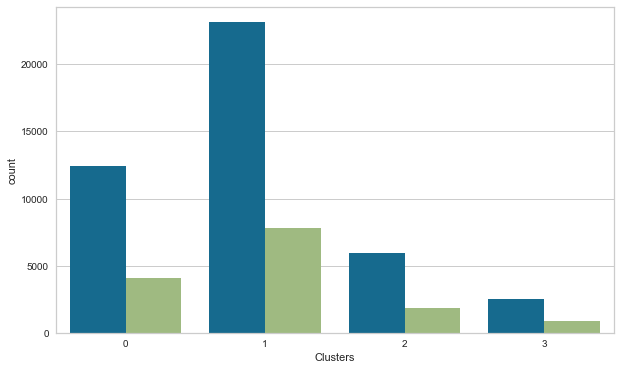

In [ ]:
# Purchase probability by cluster
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x=merged_purchase["Clusters"], hue=merged_purchase["Incidence"])

# Show the plot
plt.show()

In [ ]:
# Favourite Brand by person
favourite_brand_ind = purchase_records.groupby('ID')['Brand'].apply(lambda x: x.mode()[0])
favourite_brand_ind

ID
1      2
2      4
3      2
4      5
5      5
      ..
496    2
497    2
498    2
499    2
500    2
Name: Brand, Length: 500, dtype: int64

In [ ]:
# Favourite Brand by cluster
favourite_brand_grp = purchase_records.groupby('Clusters')['Brand'].apply(lambda x: x.mode()[0])
favourite_brand_grp

Clusters
0    5
1    5
2    5
3    2
Name: Brand, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

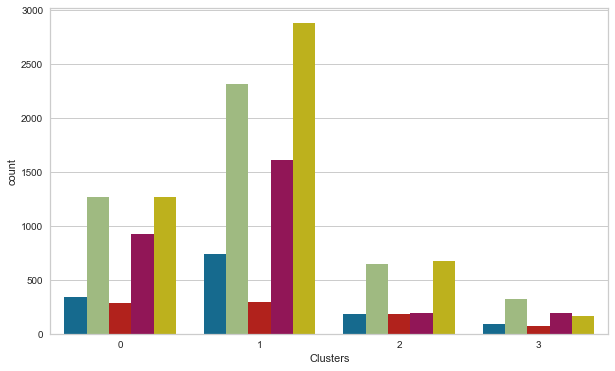

In [ ]:
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x=purchase_records["Clusters"], hue=purchase_records["Brand"])

# Show the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

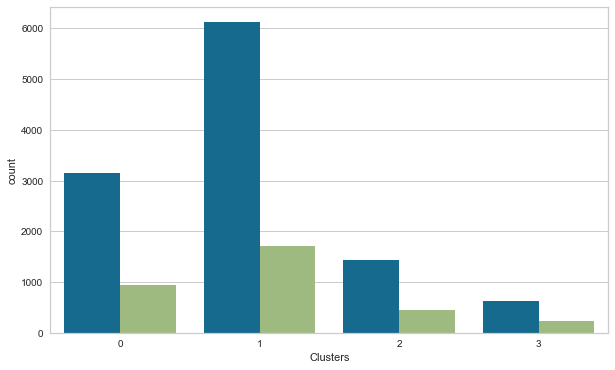

In [ ]:
# Bought promoted brand across clusters
plt.figure(figsize=(10, 6))
countplot = sns.countplot(data = purchase_records, x = "Clusters", hue = "Bought_Promoted_Brand")

# Show the plot
plt.show()

# Similar reaction to promotion

In [ ]:
purchase.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Clusters'],
      dtype='object')

In [ ]:
x= purchase_records.groupby('Clusters')[['Quantity', 'Spending', 'Is_Promotion', 'Bought_Promoted_Brand','Spending_on_Promoted_Brand']].mean()
x.head()

,Quantity,Spending,Is_Promotion,Bought_Promoted_Brand,Spending_on_Promoted_Brand
Clusters,,,,,
0,2.947407,6.036600,0.659002,0.230920,1.219496
1,2.644634,5.414919,0.661860,0.219217,1.073032
2,2.836898,5.760385,0.657219,0.237433,1.199519
3,3.005931,5.777367,0.663108,0.264531,1.353891


In [ ]:
purchase_records['Education'] = purchase_records['Education_1'] + purchase_records['Education_2']*2 + purchase_records['Education_3']*3
purchase_records['Occupation'] = purchase_records['Occupation_1'] + purchase_records['Occupation_2']*2
purchase_records['Settlement_Size'] = purchase_records['Settlement size_1'] + purchase_records['Settlement size_2']*2

C:\Users\LI RUIQIAN\AppData\Local\Temp\ipykernel_10132\286185434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_records['Education'] = purchase_records['Education_1'] + purchase_records['Education_2']*2 + purchase_records['Education_3']*3
C:\Users\LI RUIQIAN\AppData\Local\Temp\ipykernel_10132\286185434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_records['Occupation'] = purchase_records['Occupation_1'] + purchase_records['Occupation_2']*2
C:\Users\LI RUIQIAN\AppData\Local\Temp\

In [ ]:
y= purchase_records.groupby('Clusters')[['Recency','Frequency','MonetaryValue','Sex', 'Marital status', 'Age', 'Income', 'Education', 'Occupation', 'Settlement_Size']].mean()
y.head()

,Recency,Frequency,MonetaryValue,Sex,Marital status,Age,Income,Education,Occupation,Settlement_Size
Clusters,,,,,,,,,,
0,4.682241,44.468200,277.368305,0.371820,0.603474,30.234834,99006.345401,0.848337,0.449119,0.141389
1,4.644124,66.739441,366.077923,0.205436,0.303815,34.055378,132908.827357,0.708434,1.212199,1.340819
2,4.506417,82.062032,486.249112,0.617647,0.769519,57.425134,152892.196791,2.186096,1.061497,0.694652
3,4.721234,47.199288,276.970285,0.073547,0.073547,40.505338,230836.609727,0.827995,1.742586,1.761566


In [ ]:
purchase_records.head(10)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Settlement size_1,Settlement size_2,Spending,Is_Promotion,Spending_Under_Promotion,Bought_Promoted_Brand,Spending_on_Promoted_Brand,Education,Occupation,Settlement_Size
6,1,28,1,2,2,0,0,1.50,1.90,1.99,...,False,True,3.80,0,0,0,0.00,2,1,2
11,1,58,1,5,1,0,0,1.39,1.90,1.91,...,False,True,2.62,1,1,1,2.62,2,1,2
19,1,110,1,1,2,0,0,1.47,1.90,1.99,...,False,True,2.94,1,1,0,0.00,2,1,2
24,1,142,1,4,1,0,0,1.21,1.35,1.99,...,False,True,2.16,1,1,0,0.00,2,1,2
29,1,183,1,2,3,0,0,1.46,1.88,1.97,...,False,True,5.64,1,1,0,0.00,2,1,2
52,1,327,1,4,3,0,0,1.47,1.89,2.01,...,False,True,5.70,1,1,1,5.70,2,1,2
79,1,547,1,2,2,0,0,1.35,1.89,2.07,...,False,True,3.78,1,1,0,0.00,2,1,2
80,1,562,1,2,3,2,1,1.33,1.51,2.07,...,False,True,4.53,1,1,1,4.53,2,1,2
97,1,702,1,5,1,0,0,1.41,1.85,2.00,...,False,True,2.79,1,1,0,0.00,2,1,2
101,2,6,1,4,1,0,0,1.59,1.87,2.01,...,False,True,2.09,0,0,0,0.00,1,1,2


In [ ]:
purchase[purchase['ID'] == 5]

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Clusters
370,5,7,0,0,0,0,0,1.59,1.88,2.01,2.09,2.66,0,0,0,0,0,1
371,5,13,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,1
372,5,20,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,1
373,5,32,0,0,0,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,1
374,5,39,0,0,0,0,0,1.50,1.90,1.99,2.09,2.67,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5,698,0,0,0,0,0,1.42,1.51,1.97,2.24,2.77,0,0,0,0,0,1
477,5,705,0,0,0,0,0,1.49,1.87,1.99,2.24,2.79,0,0,0,0,0,1
478,5,713,0,0,0,0,0,1.51,1.84,2.06,2.24,2.80,0,0,0,0,0,1
479,5,719,0,0,0,0,0,1.50,1.80,2.14,2.24,2.79,0,0,0,0,0,1


In [ ]:
update_flag = False
last_brand = 0
last_quantity = 0
last_ID = 1

for index, row in merged_purchase.iterrows():
    row_ID = row['ID']
    if row_ID != last_ID:
        merged_purchase.at[index, 'Last_Inc_Brand'] = 0
        merged_purchase.at[index, 'Last_Inc_Quantity'] = 0
        last_ID = row_ID

        last_brand = row['Brand']
        last_quantity = row['Quantity']
        update_flag = False
        if last_brand != 0:
            update_flag = True
    else :
        if update_flag:
            merged_purchase.at[index, 'Last_Inc_Brand'] = last_brand
            merged_purchase.at[index, 'Last_Inc_Quantity'] = last_quantity
        if row['Brand'] != 0:
            update_flag = True
            merged_purchase.at[index, 'Last_Inc_Brand'] = last_brand
            merged_purchase.at[index, 'Last_Inc_Quantity'] = last_quantity
            last_brand = row['Brand']
            last_quantity = row['Quantity']
        else:
            update_flag = False
            merged_purchase.at[index, 'Last_Inc_Brand'] = last_brand
            merged_purchase.at[index, 'Last_Inc_Quantity'] = last_quantity

In [ ]:
purchase_records = merged_purchase[merged_purchase['Incidence'] > 0]
favourite_brand_df = pd.DataFrame(favourite_brand_ind).reset_index(drop = True)
favourite_brand_df['ID'] = range(1, 501)
purchase_records = pd.merge(purchase_records, favourite_brand_df, on='ID')
purchase_records.head()

,ID,Day,Incidence,Brand_x,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2,Spending,Is_Promotion,Spending_Under_Promotion,Bought_Promoted_Brand,Spending_on_Promoted_Brand,Brand_y
0,1,28,1,2,2,0,0,1.50,1.90,1.99,...,False,False,False,True,3.80,0,0,0,0.00,2
1,1,58,1,5,1,2,2,1.39,1.90,1.91,...,False,False,False,True,2.62,1,1,1,2.62,2
2,1,110,1,1,2,5,1,1.47,1.90,1.99,...,False,False,False,True,2.94,1,1,0,0.00,2
3,1,142,1,4,1,1,2,1.21,1.35,1.99,...,False,False,False,True,2.16,1,1,0,0.00,2
4,1,183,1,2,3,4,1,1.46,1.88,1.97,...,False,False,False,True,5.64,1,1,0,0.00,2


In [ ]:
purchase_records = purchase_records.rename(columns={'Brand_x': 'Brand', 'Brand_y':'Favourite_Brand'})

In [ ]:
# fav brand / total brand purchase
filtered_df = purchase_records[purchase_records['Brand'] == purchase_records['Favourite_Brand']]

# Calculate the percentage of purchasing the favorite brand for each ID
brand_loyalty = filtered_df.groupby('ID').size() / purchase_records.groupby('ID').size()
brand_loyalty

ID
1      0.444444
2      0.909091
3      0.800000
4      0.909091
5      1.000000
         ...   
496    0.700000
497    0.651163
498    0.589744
499    0.774194
500    0.866667
Length: 500, dtype: float64

In [ ]:
brand_loyalty_df = brand_loyalty.to_frame().reset_index()
brand_loyalty_df.rename(columns = {'ID': 'ID', 0:'Brand_Loyalty'}, inplace = True)
brand_loyalty_df["Clusters"] = brand_loyalty_df["ID"].map(mapper)

brand_loyalty_df

,ID,Brand_Loyalty,Clusters
0,1,0.444444,2
1,2,0.909091,1
2,3,0.800000,0
3,4,0.909091,1
4,5,1.000000,1
...,...,...,...
495,496,0.700000,1
496,497,0.651163,3
497,498,0.589744,1
498,499,0.774194,0


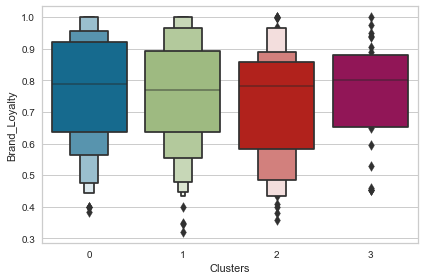

In [ ]:
# Across clusters similar brand loyalty
sns.boxenplot(x=brand_loyalty_df["Clusters"], y=brand_loyalty_df["Brand_Loyalty"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
rfm['Favourite_Brand'] = favourite_brand_df['Brand']
rfm['Brand_Loyalty'] = brand_loyalty_df['Brand_Loyalty']
rfm['Clusters'] = rfm["ID"].map(mapper)
rfm['Education'] = rfm['Education_1'] + rfm['Education_2']*2 + rfm['Education_3']*3
rfm['Occupation'] = rfm['Occupation_1'] + rfm['Occupation_2']*2
rfm['Settlement_Size'] = rfm['Settlement size_1'] + rfm['Settlement size_2']*2

rfm.head()

,ID,Recency,Frequency,MonetaryValue,Sex,Marital status,Age,Income,Education_0,Education_1,...,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2,Favourite_Brand,Brand_Loyalty,Clusters,Education,Occupation,Settlement_Size
0,1,3,9,33.96,0,0,67,124670,False,False,...,False,False,False,True,2,0.444444,2,2,1,2
1,2,1,11,41.74,1,1,22,150773,False,True,...,False,False,False,True,4,0.909091,1,1,1,2
2,3,6,10,32.27,0,0,49,89210,False,True,...,False,True,False,False,2,0.800000,0,1,0,0
3,4,5,11,32.96,0,0,45,171565,False,True,...,False,False,True,False,5,0.909091,1,1,1,1
4,5,1,13,54.97,0,0,53,149031,False,True,...,False,False,True,False,5,1.000000,1,1,1,1


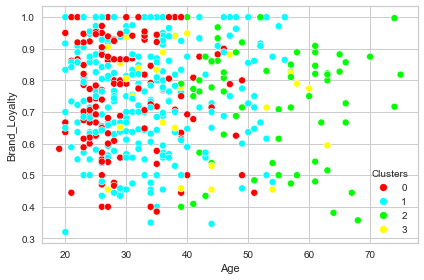

In [ ]:
bright_palette = ["#FF0000", "#00FFFF", "#00FF00", "#FFFF00"]
sns.scatterplot(x = rfm["Age"], y=rfm["Brand_Loyalty"], hue = rfm['Clusters'], palette = bright_palette)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

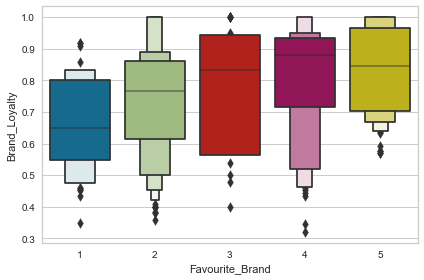

In [ ]:
sns.boxenplot(x=rfm["Favourite_Brand"], y=rfm["Brand_Loyalty"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
bright_palette = ["#FF0000", "#00FFFF", "#00FF00", "#FFFF00", "#FF00FF"]
sns.scatterplot(x = brand_loyalty_df["Brand_Loyalty"], y=brand_loyalty_df["Incidence"], hue = brand_loyalty_df['Fav_Brand'], palette = bright_palette)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

KeyError: 'Incidence'

In [ ]:
# Bought cheapest brand
purchase_records.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Spending', 'Clusters', 'Recency', 'Frequency',
       'MonetaryValue', 'Sex', 'Marital status', 'Age', 'Income',
       'Education_0', 'Education_1', 'Education_2', 'Education_3',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Settlement size_0',
       'Settlement size_1', 'Settlement size_2', 'Is_Promotion',
       'Spending_Under_Promotion', 'Bought_Promoted_Brand',
       'Spending_on_Promoted_Brand', 'Favourite_Brand', 'Daily_Min_Price',
       'Bought_Cheapest_Brand'],
      dtype='object')

In [ ]:
purchase_records['Daily_Min_Price'] = purchase_records.iloc[:, 7:12].min(axis=1)

In [ ]:
purchase_records['Bought_Cheapest_Brand'] = purchase_records.apply(lambda row: (row['Spending'] / row['Quantity']) == row['Daily_Min_Price'], axis = 1)

In [ ]:
z= purchase_records.groupby('Clusters')[['Recency','Frequency','MonetaryValue','Bought_Cheapest_Brand','Sex', 'Marital status', 'Age', 'Income', 'Education', 'Occupation', 'Settlement_Size']].mean()
z.head()

,Recency,Frequency,MonetaryValue,Bought_Cheapest_Brand,Sex,Marital status,Age,Income,Education,Occupation,Settlement_Size
Clusters,,,,,,,,,,,
0,4.669486,145.004381,391.073838,0.103172,0.078097,0.151511,35.369184,134596.095015,0.630514,1.236858,1.206193
1,4.571491,124.475011,288.395380,0.094307,0.169926,0.365493,32.107345,88986.169057,0.782703,0.037375,0.027814
2,4.523384,158.475039,488.060993,0.110352,0.628481,0.777719,56.975302,151588.715187,2.182869,1.056227,0.674199
3,4.656218,119.320954,248.136859,0.103578,0.736627,1.000000,27.312436,115937.768654,1.000000,1.010221,1.025213
4,4.822526,122.458476,268.529886,0.124005,0.092150,0.102389,40.288965,230163.924915,0.844141,1.753129,1.739477


In [ ]:
cheapest_brand = purchase_records.groupby('ID')[['Bought_Cheapest_Brand']].mean()
cheapest_brand

,Bought_Cheapest_Brand
ID,
1,0.111111
2,0.000000
3,0.100000
4,0.000000
5,0.000000
...,...
496,0.100000
497,0.069767
498,0.153846


In [ ]:
rfm['Bought_Cheapest_Brand'] = cheapest_brand['Bought_Cheapest_Brand']

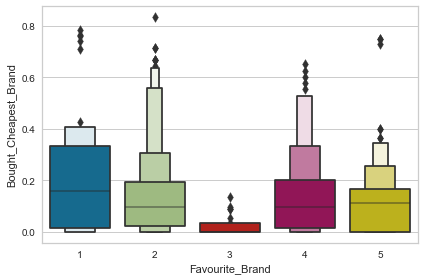

In [ ]:
sns.boxenplot(x=rfm["Favourite_Brand"], y=rfm["Bought_Cheapest_Brand"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Logit Regression with Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
# from xlogit import MultinomialLogit
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
user_reg = pd.get_dummies(user_seg, columns=['Clusters'])
user_reg['ID'] = user['ID']
user_reg.head()

,Sex,Age_Std,Income_Std,Marital status,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2,Clusters_0,Clusters_1,Clusters_2,Clusters_3,Clusters_4,ID
0,0,2.652951,0.097499,0,False,False,True,False,False,True,False,0,0,1,0,0,1,0,0,1
1,1,-1.186835,0.782459,1,False,True,False,False,False,True,False,0,0,1,0,0,0,1,0,2
2,0,1.117036,-0.832994,0,False,True,False,False,True,False,False,1,0,0,0,1,0,0,0,3
3,0,0.775722,1.328054,0,False,True,False,False,False,True,False,0,1,0,1,0,0,0,0,4
4,0,1.458351,0.736747,0,False,True,False,False,False,True,False,0,1,0,1,0,0,0,0,5


In [ ]:
user_reg.columns

Index(['Sex', 'Age_Std', 'Income_Std', 'Marital status', 'Education_0',
       'Education_1', 'Education_2', 'Education_3', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Settlement size_0',
       'Settlement size_1', 'Settlement size_2', 'Clusters_0', 'Clusters_1',
       'Clusters_2', 'Clusters_3', 'Clusters_4', 'ID'],
      dtype='object')

In [ ]:
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
0,1,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0
1,1,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0
2,1,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0
3,1,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0
4,1,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0


In [ ]:
merged_data = pd.merge(purchase, user_reg, on='ID')
merged_data.head(5)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2,Clusters_0,Clusters_1,Clusters_2,Clusters_3,Clusters_4
0,1,1,0,0,0,0,0,1.59,1.87,2.01,...,True,False,0,0,1,0,0,1,0,0
1,1,11,0,0,0,0,0,1.51,1.89,1.99,...,True,False,0,0,1,0,0,1,0,0
2,1,12,0,0,0,0,0,1.51,1.89,1.99,...,True,False,0,0,1,0,0,1,0,0
3,1,16,0,0,0,0,0,1.52,1.89,1.98,...,True,False,0,0,1,0,0,1,0,0
4,1,18,0,0,0,0,0,1.52,1.89,1.99,...,True,False,0,0,1,0,0,1,0,0


In [ ]:
merged_data.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Age_Std', 'Income_Std', 'Marital status',
       'Education_0', 'Education_1', 'Education_2', 'Education_3',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Settlement size_0',
       'Settlement size_1', 'Settlement size_2', 'Clusters_0', 'Clusters_1',
       'Clusters_2', 'Clusters_3', 'Clusters_4'],
      dtype='object')

In [ ]:
merged_data['Has_Promotion'] = merged_data.apply(lambda row: 0 if (row['Promotion_1'] + row['Promotion_2'] + row['Promotion_3'] + row['Promotion_4'] + row['Promotion_5'])== 0 else 1, axis = 1)

## Regression on purchase incidence

In [ ]:
features = merged_data[[ 'Sex', 'Age_Std', 'Income_Std', 'Marital status', 'Has_Promotion',
       'Education_1', 'Education_2', 'Education_3',
       'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2', 'Clusters_1',
       'Clusters_2', 'Clusters_3', 'Clusters_4', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5']]
target = merged_data['Incidence']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train.astype(float))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.549783
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Incidence   No. Observations:                46954
Model:                          Logit   Df Residuals:                    46927
Method:                           MLE   Df Model:                           26
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                 0.02161
Time:                        14:23:54   Log-Likelihood:                -25814.
converged:                       True   LL-Null:                       -26385.
Covariance Type:            nonrobust   LLR p-value:                6.136e-224
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3084      0.601      0.513      0.608      -0.870       1.487
Sex     

In [ ]:
X_test = sm.add_constant(X_test)
y_pred_probs = result.predict(X_test.astype(float))
for i in range(10):
    print(f"Cut off = {i/10}")
    y_pred_binary = [1 if prob > (i/10) else 0 for prob in y_pred_probs]
    accuracy = accuracy_score(y_test, y_pred_binary)
    print("Accuracy:", accuracy)

Cut off = 0.0
Accuracy: 0.24848794616236478
Cut off = 0.1
Accuracy: 0.24848794616236478
Cut off = 0.2
Accuracy: 0.3591447312377545
Cut off = 0.3
Accuracy: 0.7059374733793339
Cut off = 0.4
Accuracy: 0.7532157764715904
Cut off = 0.5
Accuracy: 0.7541528239202658
Cut off = 0.6
Accuracy: 0.7544935684470568
Cut off = 0.7
Accuracy: 0.7550046852372434
Cut off = 0.8
Accuracy: 0.7532157764715904
Cut off = 0.9
Accuracy: 0.7515120538376352


In [ ]:
y_pred_binary = [1 if prob > 0.7 else 0 for prob in y_pred_probs]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7550046852372434


In [ ]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      8822
           1       0.79      0.02      0.04      2917

    accuracy                           0.76     11739
   macro avg       0.77      0.51      0.45     11739
weighted avg       0.76      0.76      0.66     11739



### Try Balance Dataset

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train.astype(float))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.678632
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Incidence   No. Observations:                70466
Model:                          Logit   Df Residuals:                    70439
Method:                           MLE   Df Model:                           26
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                 0.02094
Time:                        14:24:23   Log-Likelihood:                -47821.
converged:                       True   LL-Null:                       -48843.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4636      0.444      1.045      0.296      -0.406       1.333
Sex     

In [ ]:
X_test = sm.add_constant(X_test)
y_pred_probs = result.predict(X_test.astype(float))
for i in range(10):
    print(f"Cut off = {i/10}")
    y_pred_binary = [1 if prob > (i/10) else 0 for prob in y_pred_probs]
    accuracy = accuracy_score(y_test, y_pred_binary)
    print("Accuracy:", accuracy)

Cut off = 0.0
Accuracy: 0.24848794616236478
Cut off = 0.1
Accuracy: 0.24848794616236478
Cut off = 0.2
Accuracy: 0.24848794616236478
Cut off = 0.3
Accuracy: 0.24848794616236478
Cut off = 0.4
Accuracy: 0.30062185876139363
Cut off = 0.5
Accuracy: 0.560950677229747
Cut off = 0.6
Accuracy: 0.7397563676633444
Cut off = 0.7
Accuracy: 0.7543231961836613
Cut off = 0.8
Accuracy: 0.7542380100519636
Cut off = 0.9
Accuracy: 0.753726893261777


In [ ]:
y_pred_binary = [1 if prob > 0.8 else 0 for prob in y_pred_probs]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred_binary))

Accuracy: 0.7542380100519636
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      8822
           1       0.69      0.02      0.04      2917

    accuracy                           0.75     11739
   macro avg       0.72      0.51      0.45     11739
weighted avg       0.74      0.75      0.66     11739



## Brand choice with clustering

In [ ]:
merged_data_filtered = merged_data[merged_data['Incidence'] == 1]

In [ ]:
merged_data_filtered = pd.get_dummies(merged_data_filtered, columns = ['Last_Inc_Brand', 'Brand'])

In [ ]:
features2 = merged_data_filtered[['Price_1', 'Price_2', 'Price_3',
                     'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
                     'Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1',
                     'Last_Inc_Brand_2', 'Last_Inc_Brand_3', 'Last_Inc_Brand_4',
                     'Last_Inc_Brand_5', 'Clusters_1', 'Clusters_2', 'Clusters_3', 'Clusters_4']]
target2 = merged_data_filtered['Brand_1']

X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=42)

In [ ]:
X_train2 = sm.add_constant(X_train2)
logit_model2 = sm.Logit(y_train2, X_train2.astype(float))
result2 = logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Brand_1   No. Observations:                11710
Model:                          Logit   Df Residuals:                    11690
Method:                           MLE   Df Model:                           19
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                     inf
Time:                        10:43:21   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.4257      1.935     -1.770      0.077      -7.219       0.367
Price_1         

E:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
E:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
## clusters not significant in this case

# Forecasting

Each cluster => average number of visits * forecast whether will purchase * forecast which brand to purchase

In [ ]:
import random

In [ ]:
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Clusters
0,1,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,2
1,1,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,2
2,1,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,2
3,1,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,2
4,1,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,2


In [ ]:
purchase.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Clusters'],
      dtype='object')

In [ ]:
user.head()

,Sex,Marital status,Age,Income,ID,Education_0,Education_1,Education_2,Education_3,Occupation_0,...,Age_Band_2,Age_Band_3,Age_Band_4,Income_Band_1,Income_Band_2,Income_Band_3,Income_Band_4,Age_Std,Income_Std,Clusters
0,0,0,67,124670,1,False,False,True,False,False,...,0,0,1,0,1,0,0,2.652951,0.097499,2
1,1,1,22,150773,2,False,True,False,False,False,...,0,0,0,0,0,1,0,-1.186835,0.782459,3
2,0,0,49,89210,3,False,True,False,False,True,...,0,1,0,1,0,0,0,1.117036,-0.832994,1
3,0,0,45,171565,4,False,True,False,False,False,...,0,1,0,0,0,1,0,0.775722,1.328054,0
4,0,0,53,149031,5,False,True,False,False,False,...,0,1,0,0,1,0,0,1.458351,0.736747,0


In [ ]:
purchase.groupby('Clusters')['Incidence'].mean()

Clusters
0    0.257889
1    0.253303
2    0.242297
3    0.237114
4    0.237119
Name: Incidence, dtype: float64

In [ ]:
appearance = purchase.groupby(['Clusters', 'ID']).size()

In [ ]:
appearance.groupby('Clusters').mean()

Clusters
0    118.294931
1    116.461538
2    119.000000
3    115.682243
4    115.843750
dtype: float64

In [ ]:
# Init days of visit
frequency = [118, 116, 119, 116, 116]

id_sequence = []
day_sequence = []

for i in range(501, 2001):
    user_info = user[user['ID'] == i]
    cluster = user_info['Clusters'].iloc[0]
    num_of_days = frequency[cluster]
    gap = int(730 / num_of_days)
    init = 1
    days = sorted(random.sample(range(1, 731), num_of_days))
    day_sequence.extend(days)

    for j in range(num_of_days):
        id_sequence.append(i)


In [ ]:
syn_records = pd.DataFrame(list(zip(id_sequence, day_sequence)), columns = ['ID', 'Day'])

In [ ]:
syn_records.head()

,ID,Day,Incidence,Clusters
0,501,6,0,3
1,501,8,0,3
2,501,21,0,3
3,501,23,0,3
4,501,25,0,3


In [ ]:
syn_records['Incidence']=0

In [ ]:
mapper = dict(zip(user['ID'], user['Clusters']))
syn_records["Clusters"] = syn_records["ID"].map(mapper)

In [ ]:
purchase_rate= [0.257889,0.253303,0.242297,0.237114,0.237119]
num_inc = []
for i in range(5):
    num_inc.append(int(purchase_rate[i] * frequency[i]))

num_inc

[30, 29, 28, 27, 27]

In [ ]:
for i in range(501, 2001):
    print(i)
    visit = syn_records[syn_records['ID'] == i]
    visit_days = visit['Day'].tolist()
    cluster = visit['Clusters'].iloc[0]

    inc_days = random.sample(visit_days, num_inc[cluster])

    syn_records['Incidence'] = syn_records.apply(lambda row, id_val=i: 1 if row['ID'] == id_val and row['Day'] in inc_days else row['Incidence'], axis = 1)

501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750


In [ ]:
syn_records[syn_records['Incidence'] == 1]

,ID,Day,Incidence,Clusters
8,501,63,1,3
10,501,72,1,3
13,501,91,1,3
14,501,92,1,3
15,501,93,1,3
...,...,...,...,...
175474,2000,614,1,1
175477,2000,622,1,1
175480,2000,642,1,1
175481,2000,654,1,1


In [ ]:
# Map day information from purchase
selected = purchase[['Day', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          58693 non-null  int64  
 1   Price_1      58693 non-null  float64
 2   Price_2      58693 non-null  float64
 3   Price_3      58693 non-null  float64
 4   Price_4      58693 non-null  float64
 5   Price_5      58693 non-null  float64
 6   Promotion_1  58693 non-null  int64  
 7   Promotion_2  58693 non-null  int64  
 8   Promotion_3  58693 non-null  int64  
 9   Promotion_4  58693 non-null  int64  
 10  Promotion_5  58693 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 4.9 MB


In [ ]:
selected = selected.drop_duplicates()
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 7872
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          730 non-null    int64  
 1   Price_1      730 non-null    float64
 2   Price_2      730 non-null    float64
 3   Price_3      730 non-null    float64
 4   Price_4      730 non-null    float64
 5   Price_5      730 non-null    float64
 6   Promotion_1  730 non-null    int64  
 7   Promotion_2  730 non-null    int64  
 8   Promotion_3  730 non-null    int64  
 9   Promotion_4  730 non-null    int64  
 10  Promotion_5  730 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 68.4 KB


In [ ]:
syn_merged = pd.merge(syn_records, selected, on='Day')

In [ ]:
syn_merged.describe()

,ID,Day,Incidence,Clusters,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
count,175497.000000,175497.000000,175497.000000,175497.000000,175497.00000,175497.000000,175497.000000,175497.000000,175497.000000,175497.000000,175497.000000,175497.000000,175497.000000,175497.000000
mean,1249.046274,365.253833,0.243736,1.510305,1.39313,1.782213,2.009084,2.163747,2.657931,0.321162,0.302512,0.040177,0.109210,0.032599
std,432.542918,210.869105,0.429337,1.228674,0.09143,0.168608,0.046946,0.089198,0.097465,0.466924,0.459347,0.196375,0.311903,0.177585
min,501.000000,1.000000,0.000000,0.000000,1.10000,1.260000,1.870000,1.760000,2.110000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,875.000000,183.000000,0.000000,0.000000,1.34000,1.690000,1.990000,2.120000,2.630000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1248.000000,365.000000,0.000000,1.000000,1.39000,1.880000,2.010000,2.180000,2.670000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1623.000000,548.000000,0.000000,3.000000,1.47000,1.890000,2.060000,2.240000,2.700000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2000.000000,730.000000,1.000000,4.000000,1.59000,1.900000,2.140000,2.260000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
syn_merged.to_csv('Forecast.csv', index = False)

In [ ]:
syn_merged.columns

Index(['ID', 'Day', 'Incidence', 'Clusters', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5'],
      dtype='object')

In [ ]:
syn_merged['Brand'] = 0

In [ ]:
syn_filtered = syn_merged[syn_merged['Incidence'] == 1]

In [ ]:
syn_filtered_comp = pd.merge(syn_filtered, user[['Sex', 'Marital status', 'Age', 'Income', 'ID', 'Education_0',
       'Education_1', 'Education_2', 'Education_3', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Settlement size_0',
       'Settlement size_1', 'Settlement size_2']], on = 'ID')
syn_filtered_comp.head()

,ID,Day,Incidence,Clusters,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,...,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,591,6,1,2,1.59,1.87,2.01,2.09,2.66,0,...,False,False,True,False,True,False,False,1,0,0
1,591,8,1,2,1.51,1.89,1.95,2.09,2.66,0,...,False,False,True,False,True,False,False,1,0,0
2,591,211,1,2,1.49,1.78,1.99,1.97,2.67,0,...,False,False,True,False,True,False,False,1,0,0
3,591,215,1,2,1.34,1.89,1.99,2.13,2.67,0,...,False,False,True,False,True,False,False,1,0,0
4,591,359,1,2,1.33,1.89,2.02,2.02,2.69,0,...,False,False,True,False,True,False,False,1,0,0


In [ ]:
syn_filtered_comp['Age_Std'] = syn_filtered_comp['Age'].apply(lambda x: (x - syn_filtered_comp['Age'].mean())/syn_filtered_comp['Age'].std())
syn_filtered_comp['Income_Std'] = syn_filtered_comp['Income'].apply(lambda x: (x - syn_filtered_comp['Income'].mean())/syn_filtered_comp['Income'].std())

In [ ]:
syn_filtered_comp.columns

Index(['ID', 'Day', 'Incidence', 'Clusters', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Brand', 'Sex', 'Marital status', 'Age',
       'Income', 'Education_0', 'Education_1', 'Education_2', 'Education_3',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Settlement size_0',
       'Settlement size_1', 'Settlement size_2', 'Age_Std', 'Income_Std'],
      dtype='object')

In [ ]:
# Train multinomial regression for prediction of brand
merged_data_filtered = merged_data[merged_data['Incidence'] == 1]
features = merged_data_filtered[[ 'Sex', 'Age_Std', 'Income_Std', 'Marital status',
       'Education_1', 'Education_2', 'Education_3',
       'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2', 'Clusters_1',
       'Clusters_2', 'Clusters_3', 'Clusters_4', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5']]
target = merged_data_filtered['Brand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.37      0.04      0.08       256
           2       0.45      0.63      0.52       897
           3       0.38      0.02      0.03       182
           4       0.36      0.15      0.22       583
           5       0.46      0.62      0.53      1010

    accuracy                           0.44      2928
   macro avg       0.40      0.29      0.27      2928
weighted avg       0.42      0.44      0.39      2928



E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Make prediction on brand of purchase
syn_filtered_comp = pd.get_dummies(syn_filtered_comp, columns = ['Clusters'])

In [ ]:
X_syn = syn_filtered_comp[[ 'Sex', 'Age_Std', 'Income_Std', 'Marital status',
       'Education_1', 'Education_2', 'Education_3',
       'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2', 'Clusters_1',
       'Clusters_2', 'Clusters_3', 'Clusters_4', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5']]

y_syn = model.predict(X_syn)
syn_filtered_comp['Brand'] = y_syn

In [ ]:
syn_filtered_comp[['ID','Day','Incidence','Brand']]

,ID,Day,Incidence,Brand
0,591,6,1,5
1,591,8,1,5
2,591,211,1,2
3,591,215,1,5
4,591,359,1,5
...,...,...,...,...
42770,834,425,1,2
42771,834,651,1,2
42772,834,89,1,2
42773,834,612,1,2


In [ ]:
# Map Brand back to syn_merged
syn_filtered_comp['ID_Day'] = syn_filtered_comp['ID'].astype(str) + '_' + syn_filtered_comp['Day'].astype(str)
pred_mapper = dict(zip(syn_filtered_comp['ID_Day'], syn_filtered_comp['Brand']))

syn_merged["Brand"] = syn_merged['ID'].astype(str) + '_' + syn_merged['Day'].astype(str)
syn_merged["Brand"] = syn_merged["Brand"].map(pred_mapper)
syn_merged["Brand"].fillna(0, inplace=True)
syn_merged['Brand'] = syn_merged['Brand'].astype(int)

In [ ]:
syn_merged.to_csv('Forecasted_Sales.csv', index = False)

# Forecast Analysis

In [ ]:
forecast = pd.read_csv('Forecasted_Sales.csv')
forecast = forecast.sort_values(by=['ID','Day'])

In [ ]:
forecast.head()

,ID,Day,Incidence,Clusters,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Brand
0,501,6,0,3,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,0
248,501,8,0,3,1.51,1.89,1.95,2.09,2.66,0,0,0,0,0,0
494,501,21,0,3,1.52,1.90,1.99,2.09,2.66,0,0,0,0,0,0
744,501,23,0,3,1.50,1.90,1.99,2.09,2.66,0,0,0,0,0,0
1024,501,25,0,3,1.50,1.90,1.99,2.09,2.66,0,0,0,0,0,0


In [ ]:
forecast_filtered = forecast[forecast['Incidence']==1]

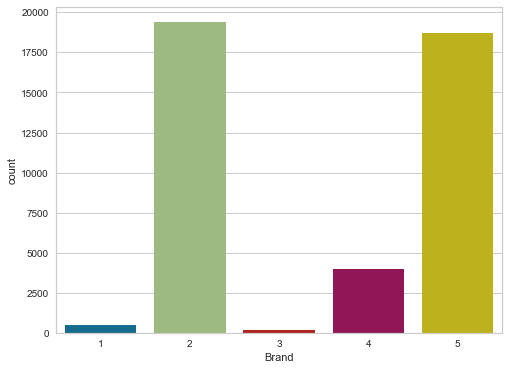

In [ ]:
# Create a countplot of the cluster distribution
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x=forecast_filtered['Brand'])

# Show the plot
plt.show()